In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import  OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector

In [2]:
housing = pd.read_csv("C:/Python/Datasets/Housing.csv")
X = housing.drop('price', axis=1)
y = housing['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [3]:
ohe = OneHotEncoder(sparse_output=False, drop='first').set_output(transform='pandas')
trns = make_column_transformer((ohe, make_column_selector(dtype_include=object) ), 
                               remainder='passthrough', verbose_feature_names_out=False)
trns = trns.set_output(transform='pandas')
X_train_trns = trns.fit_transform(X_train)
X_test_trns = trns.transform(X_test)

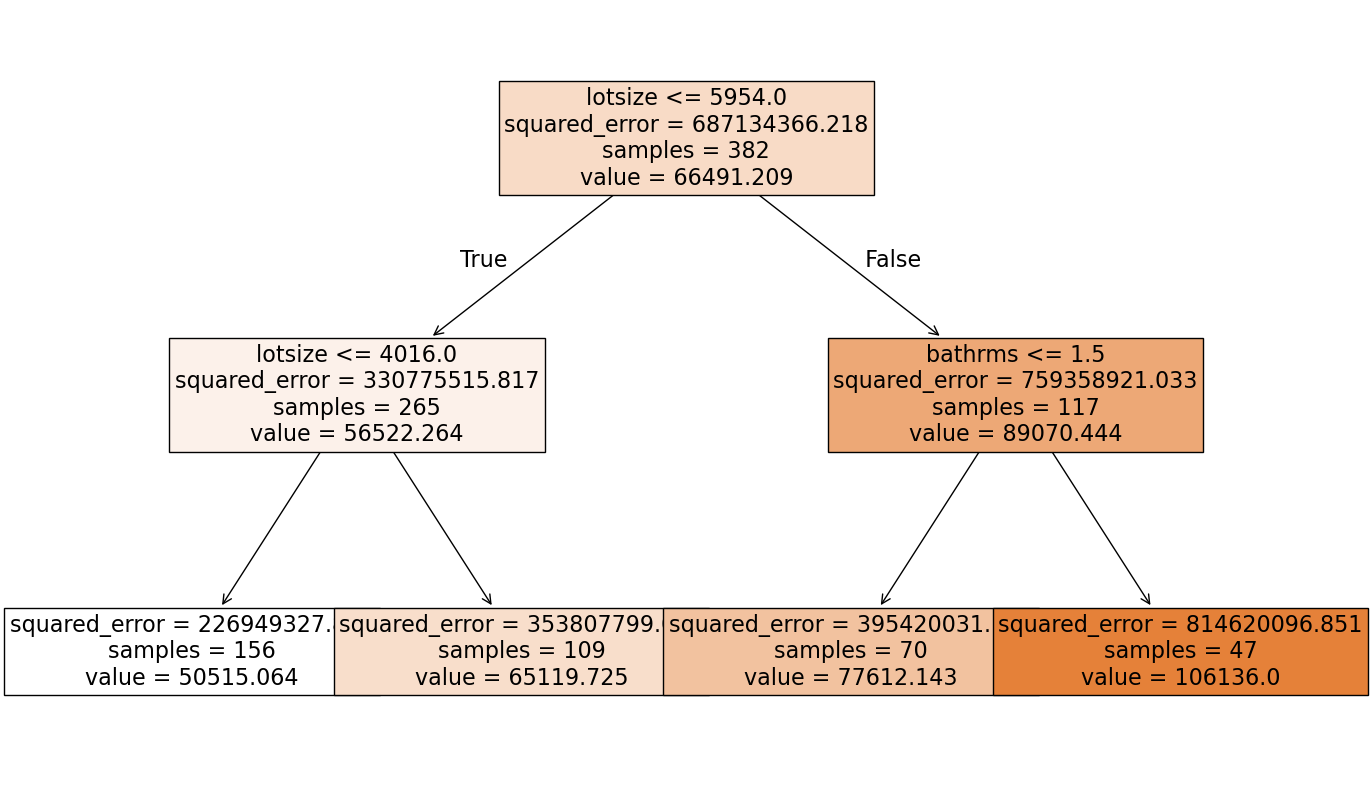

In [ ]:
dtr = DecisionTreeRegressor(random_state=25, max_depth=2)
dtr.fit(X_train_trns, y_train)
plt.figure(figsize=(17,10))
plot_tree(dtr, feature_names=list(X_train_trns.columns),filled=True,fontsize=16)
plt.show() 

In [7]:
y_train.mean()

66491.20942408378

In [10]:
np.mean((y_train - y_train.mean())**2)

687134366.2179216

In [29]:
y_left = y_train[X_train['lotsize']<=5954]
y_left.mean()

56522.264150943396

In [30]:
y_right = y_train[X_train['lotsize']>5954]
y_right.mean()

89070.44444444444

In [22]:
depths = [2,3,4,5,8, None]
leaves = [1,5,10,20,50]
splits = [2,5,10,20,50]
scores = []
for d in depths:
    for l in leaves:
        for s in splits:
            dtc = DecisionTreeRegressor(random_state=25, max_depth=d,
                                         min_samples_leaf=l, min_samples_split=s)
            dtc.fit(X_train_trns, y_train)
            y_pred = dtc.predict(X_test_trns)
            scores.append([d,l,s, r2_score(y_test, y_pred )] )
df_scores = pd.DataFrame( scores, columns=['depth','leaf','split','score'] )
df_scores.sort_values( 'score', ascending=False )

,depth,leaf,split,score
103,8.0,1,20,0.520188
108,8.0,5,20,0.517948
128,NaN,1,20,0.516177
78,5.0,1,20,0.514985
133,NaN,5,20,0.513971
...,...,...,...,...
127,NaN,1,10,0.344446
101,8.0,1,5,0.339508
126,NaN,1,5,0.286563
100,8.0,1,2,0.282023


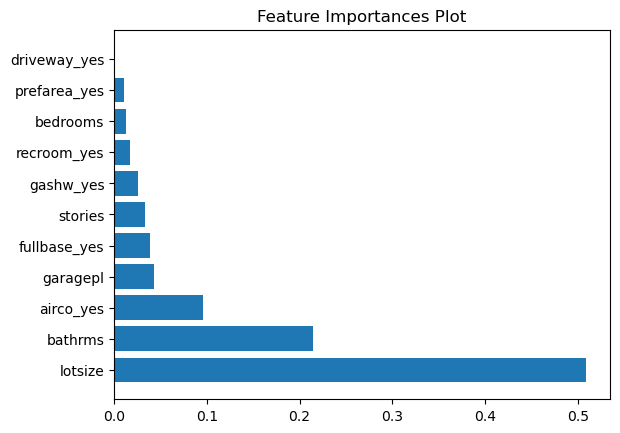

In [25]:
best_tree = DecisionTreeRegressor(random_state=25, max_depth=8,
                                  min_samples_leaf=1, min_samples_split=20)
X_trns = trns.fit_transform(X)
best_tree.fit(X_trns, y)
df_imp = pd.DataFrame({'feature':list(X_trns.columns),'imp': best_tree.feature_importances_})
df_imp = df_imp.sort_values('imp', ascending=False)
plt.barh(df_imp['feature'], df_imp['imp'])
plt.title("Feature Importances Plot")
plt.show()

In [27]:
housing.groupby('bathrms')['price'].mean()

bathrms
1     60153.233831
2     88702.947368
3    104030.000000
4    175000.000000
Name: price, dtype: float64

In [31]:
concrete = pd.read_csv("C:/Python/Cases/Concrete_Strength/Concrete_Data.csv")
X = concrete.drop('Strength', axis=1)
y = concrete['Strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [32]:
depths = [2,3,4,5,8, None]
leaves = [1,5,10,20,50]
splits = [2,5,10,20,50]
scores = []
for d in depths:
    for l in leaves:
        for s in splits:
            dtc = DecisionTreeRegressor(random_state=25, max_depth=d,
                                         min_samples_leaf=l, min_samples_split=s)
            dtc.fit(X_train, y_train)
            y_pred = dtc.predict(X_test)
            scores.append([d,l,s, r2_score(y_test, y_pred )] )
df_scores = pd.DataFrame( scores, columns=['depth','leaf','split','score'] )
df_scores.sort_values( 'score', ascending=False )

,depth,leaf,split,score
125,NaN,1,2,0.812776
126,NaN,1,5,0.809676
127,NaN,1,10,0.803606
101,8.0,1,5,0.795461
102,8.0,1,10,0.793902
...,...,...,...,...
21,2.0,50,5,0.430068
22,2.0,50,10,0.430068
23,2.0,50,20,0.430068
24,2.0,50,50,0.430068


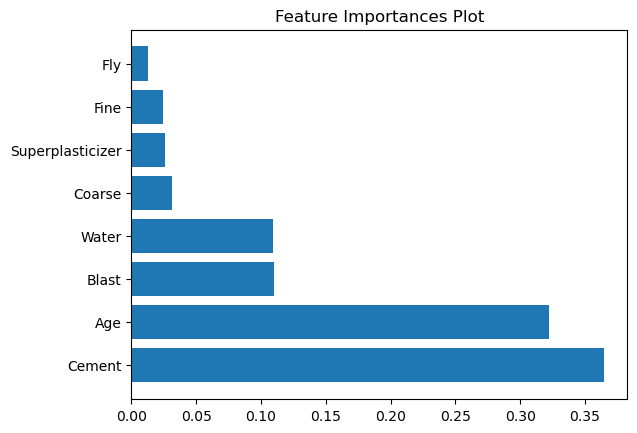

In [33]:
best_tree = DecisionTreeRegressor(random_state=25, max_depth=None,
                                  min_samples_leaf=1, min_samples_split=2)

best_tree.fit(X, y)
df_imp = pd.DataFrame({'feature':list(X.columns),'imp': best_tree.feature_importances_})
df_imp = df_imp.sort_values('imp', ascending=False)
plt.barh(df_imp['feature'], df_imp['imp'])
plt.title("Feature Importances Plot")
plt.show()